<div style="background:#e5e5e5; color:#000; padding:10px">

Привет еще раз!\
    Все замечания устранены, отличная работа! Проект принят, ты молодец!
   
Желаю тебе успехов во всех будущих начинаниях! 🙂
</div> 

<div style="border:solid black 2px; padding: 20px">
Гузель, привет!

Меня зовут Сергей, и я буду делать ревью твоего проекта. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. Моя основная цель - не указать тебе на совершенные тобой ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
    
Свои комментарии я буду выделять следующим образом:
<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Так выделено то, что необходимо исправить, прежде чем я смогу принять твой проект.
</div>
    
    
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Так отмечены не обязательные к доработке моменты. Mожешь учесть их при редактировании проекта. На твое усмотрение.
</div>
    
    
<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ А так удачные решения и подходы, на которые стоит опираться в будущих проектах.
</div>
    
    
<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
  📃 Такой комментарий будет в конце тетрадки. В нем будут еще раз указаны нюансы, требующие обязательного исправления.
</div>

Предлагаю работать над проектом в форме диалога: если ты <b>что-то меняешь</b> в работе по моим рекомендациям — <b>напиши об этом</b> в ячейке `Markdown` и помечай комментарий каким-то заметным цветом, например так:
    
    
```
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Текст комментария.
</div>
```
    
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Текст комментария.
</div>
    
Пожалуйста, <b>не перемещай, не изменяй и не удаляй мои комментарии</b>. Такой формат работы поможет выполнить повторную проверку твоего проекта оперативнее.

<div style="background:#e5e5e5; color:#000; padding:10px">
    <b>Общее впечатление о проекте</b>
    
Ты верно провела приоритезацию гипотез и проанализировала результаты A/B-теста. Но в проекте есть моменты, которые требуют твоего внимания и доработки. 
</div>

# A/B-тест интернет-магазина

**Описание проекта**

Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.

**Цель исследования** - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных:**

В основных данных есть информация о 9 гипотезах по увеличению выручки интернет-магазина и результатах A/B-теста.

Пути к файлам:
- */datasets/hypothesis.csv*
- */datasets/orders.csv*
- */datasets/visitors.csv*

Переменные:

*Гипотезы*:

 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

*Заказы*:

 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.

*Пользователи*:

 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста
 
**План исследования:**

1. Загрузка данных
2. Предобработка данных
3. Приоритизация гипотез
4. Анализ A/B-теста
5. Общий вывод

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Хорошо, что есть описание и цели проекта.
</div>

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 150)
pd.set_option('max_columns', None)

#### Загрузка данных

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Изучим данные файла с гипотезами

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Всего 9 гипотез. Тип данных представлен верно, пропущенных значений нет. Названия столбцов нужно привести к нижнему регистру.

Исследуем данные о заказах

In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Не выводи на показ весь датафрейм, при больших объемах можно подвесить ноутбук. Используй head(), tail() или sample().
</div>

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.duplicated().sum()

0

Проверим пользователей, которые могли попасть сразу в две группы

In [9]:
visitors_A = orders[orders['group'] == 'A']['visitorId']
visitors_B = orders[orders['group'] == 'B']['visitorId']

visitors_AB = visitors_A[visitors_A.isin(visitors_B)]

len(visitors_AB.unique())

58

Всего 58 пользователей, которые попали в две группы теста. Для чистоты результатов исключим данные пользователей, так как их маленькое количество.

In [10]:
orders = orders.query('visitorId not in @visitors_AB')

In [11]:
len(orders['transactionId'].unique())

1016

In [12]:
len(orders['visitorId'].unique())

973

In [13]:
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

Информация представлена по 1016 заказам и 973 пользователям. Дубликатов заказов нет. 548 заказов пользователей из группы B и 468 заказов из группы А. Пропущенных значений нет. Нужно привести столбец date к типу даты, остальные типы данных корректные. Названия столбцов также нужно привести к единому стилю

Исследуем данные о пользователях

In [14]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
len(visitors['group'].unique())

2

In [17]:
visitors.duplicated().sum()

0

Пропущенных значений и дубликатов нет. Нужно привести столбец date к типу даты, остальные типы данных корректные.

**Вывод**

Мы загрузили данные из 3 таблиц, включающих в себя информацию по гипотезам, заказам и пользователям. Всего представлена информация по 9 гипотезам,  1016 заказам и 973 пользователям, которые совершили заказ. Из данных были исключены 58 пользователей, которые попали в обе группы теста. В данных нет пропущенных значений и дубликатов. Необходимо привести столбцы с датами к нужному формату, а также названия столбцов привести к единому стилю.

#### Предобработка данных

Приведем столбец date к нужному типу данных в таблицах

In [18]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

Приведем названия столбцов к единому стилю

In [19]:
hypothesis.rename(columns=str.lower, inplace=True)
hypothesis["hypothesis"] = hypothesis["hypothesis"].str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [20]:
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


**Вывод**

Мы выполнили предобработку данных. Привели столбцы с датой к нужному типу данных в таблицах. А также привели названия столбцов к единому стилю

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Данные получены и подготовлены к анализу! Хорошо, что заметила неверный формат даты и поменяла.
</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ В конце первого шага можно написать краткий вывод: что обнаружили и как исправили.  
</div>

#### Приоритизация гипотез

##### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [21]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']

print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       запустить акцию, дающую скидку на товар в день рождения   
0            добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     запустить собственную службу доставки, что сократит срок доставки заказов   
5                      добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее приоритетные гипотезы по ICE: 8, 0, 7.

Самая приоритетная (8) - запустить акцию, дающую скидку на товар в день рождения и (0) - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

##### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [22]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']

print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       запустить акцию, дающую скидку на товар в день рождения   
3           изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     запустить собственную службу доставки, что сократит срок доставки заказов   
5                      добавить страницу отзывов клиентов о магазине, что позвол

По RICE наиболее приоритетные гипотезы : 7, 2, 0, 6.

Наиболее приоритетная (7) - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и (2) - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

##### Изменение приоритизации гипотез при применении RICE вместо ICE

Приоритизация гипотез меняется при применении каждого фреймворка, так как при использовании RICE мы учитываем охват изменений, в отличие от ICE, что является важным критерием при оценке гипотезы. Таким образом гипотеза 8 при оценке RICE получила гораздо меньший приоритет, так как ее показатель reach всего 1, что подразумевает маленький охват.

Наиболее приоритетными можно назвать гипотезы 7 и 0. При применении каждого фреймворка эти гипотезы имеют высокие показатели.

 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Хорошая работа, корректно применены фреймворки и проанализированы полученные результаты. 
        
    
Результаты можно было бы объединить в единой таблице для наглядности. Также их можно было бы проранжировать и выделить цветом: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

А в качестве визуализации изменения приоритетов можно использовать: <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a>, <a href="https://cduvallet.github.io/posts/2018/03/slopegraphs-in-python">slope graph 2</a>, <a href="https://chart-studio.plotly.com/~pcchang/224/slopegraph-spending-and-academic-performance-by-states-doc/#/">реализация на plotly</a>
   
</div>

#### Анализ A/B-теста

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
  
 
  ❌ Еще остается не выполненным на этапе предобработки, но тем не менее важным - проверить корректность разбиения пользователей на группы - может быть есть пользователи, попавшие в обе группы? Если таковые пользователи есть, нужно их выявить и выработать стратегию работы с такими данными. Пересечение групп сильно влияет на результаты теста, если процент достаточно большой. Если есть возможность их можно удалить и посмотреть, какие результаты получаются без них, в любом случае к результатам теста придется относится осторожно.
</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Результаты теста они больше не искажают. 
</div>

Подготовим данные для анализа A/B-теста,  сформируем единый датафрейм

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Ниже код идет без комментариев. Лучше оставлять небольшой комментарий о том, что делаем в ячейке. Так тебе или твоим коллегам в будущем будет проще разобраться с кодом.
</div>

In [23]:
#разделим пользователей по группам и посчитаем кумулятивные данные по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#сумма посетителей группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#посчитаем кумулятивные данные по дням группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#сумма посетителей группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#количество заказов группы А по дням
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
#количество заказов группы В по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединим данные в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


Мы сформировали единый датафрейм:

date — дата;

ordersPerDateA — количество заказов в выбранную дату в группе A;

revenuePerDateA — суммарная выручка в выбранную дату в группе A;

ordersPerDateB — количество заказов в выбранную дату в группе B;

revenuePerDateB — суммарная выручка в выбранную дату в группе B;

ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

visitorsPerDateA — количество пользователей в выбранную дату в группе A;

visitorsPerDateB — количество пользователей в выбранную дату в группе B;

visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

##### Построим график кумулятивной выручки по группам

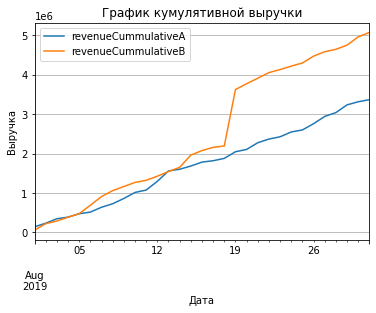

In [24]:
data.plot(x='date', y=['revenueCummulativeA', 'revenueCummulativeB'], grid=True)

plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Исходя из графика кумулятивной выручки можно увидеть, что у группы В выручка больше, чем у группы А на протяжении почти всего периода. Заметно резкое увеличение показателей 18 числа, которое увеличило разрыв еще больше. 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ График построен верно и можем зафиксировать аномалию в группе В.
</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Чтобы при построении графика не выскакивали технические надписи вроде: `Text(0, 0.5, 'Выручка')` добавляй в конце вывода `plt.show();`. 

</div>

##### Построим график кумулятивного среднего чека по группам

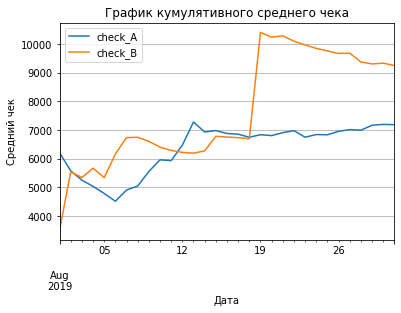

In [25]:
data['check_A'] = data['revenueCummulativeA']/data['ordersCummulativeA']
data['check_B'] = data['revenueCummulativeB']/data['ordersCummulativeB']

data.plot(x='date', y=['check_A', 'check_B'], grid=True)

plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

На графике кумулятивного среднего чека можно увидеть, что в группе В средний чек почти все время выше, чем в группе А. Исключение только составляет период с 12 по 15 число, где группа А преобладает. С 18 числа наблюдается скачкообразный рост в группе В, который потом идет на спад. 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Тут так-же группа В выделяется.
</div>

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

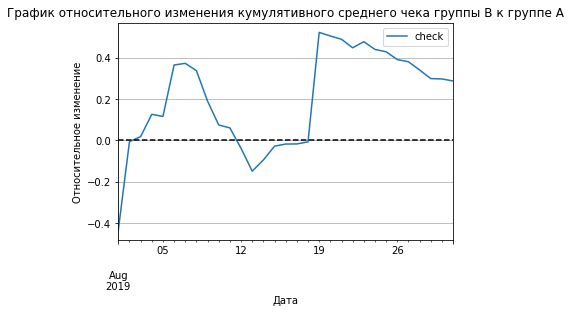

In [26]:
data['check'] = data['check_B']/data['check_A']-1

data.plot(x='date', y='check', grid=True)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

Исходя из графика можно увидеть резкие различия кумулятивного среднего чека группы B к группе A. 18 числа наблюдается резкий скачок, который потом пошел на спад

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Похоже на крупные заказы.
</div>

##### Построим график кумулятивного среднего количества заказов на посетителя по группам

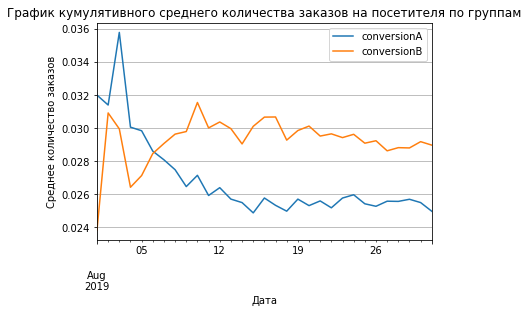

In [27]:
data['conversionA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']

data.plot(x='date', y=['conversionA', 'conversionB'], grid=True)

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.show()

Можно увидеть, что среднее количество заказов группы В выше, чем у группы А на протяжении почти всего периода. 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Группа В в лидерах.
</div>


##### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

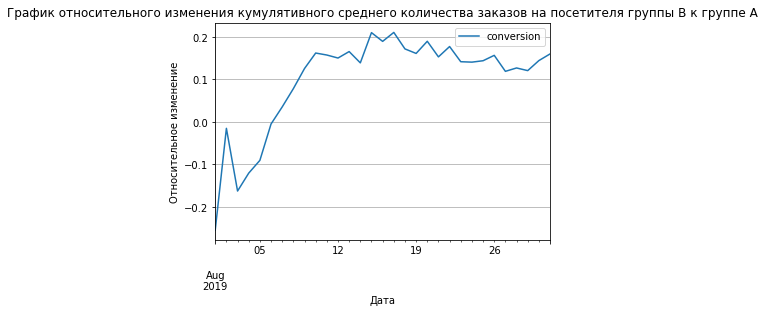

In [28]:
data['conversion'] = data['conversionB']/data['conversionA']-1

data.plot(x='date', y='conversion', grid=True)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

График относительного изменения кумулятивного среднего количества заказов на посетителя показывает, что группа B имеет лучшие показатели конверсии, чем группа А. 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Да, группа В выше, а еще в последней трети эксперимента наблюдается стабилизация результатов.
</div>

##### Построим точечный график количества заказов по пользователям

In [29]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'count'})
ordersByUsersA.columns = ['visitor_id', 'transactions']
ordersByUsersA

,visitor_id,transactions
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [30]:
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'count'})
ordersByUsersB.columns = ['visitor_id', 'transactions']
ordersByUsersB

,visitor_id,transactions
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


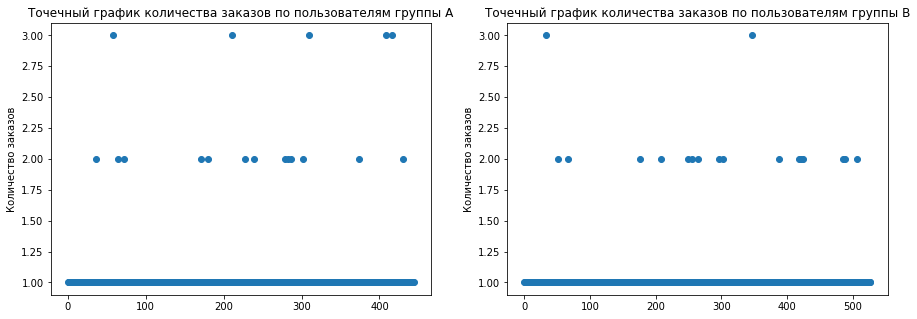

In [31]:
x_values = pd.Series(range(0,len(ordersByUsersA)))
y_values = pd.Series(range(0,len(ordersByUsersB)))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(x_values, ordersByUsersA['transactions']) 
plt.title('Точечный график количества заказов по пользователям группы А')
plt.ylabel('Количество заказов')

plt.subplot(1, 2, 2)
plt.scatter(y_values, ordersByUsersB['transactions']) 
plt.title('Точечный график количества заказов по пользователям группы В')
plt.ylabel('Количество заказов')
plt.show()

Можно увидеть, что в обеих группах большинство пользователей совершает не больше 1 заказа. Остальные случаи довольно редкие.

##### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [32]:
np.percentile(ordersByUsersA['transactions'], [95, 99])

array([1.  , 2.56])

In [33]:
np.percentile(ordersByUsersB['transactions'], [95, 99])

array([1., 2.])

Не более 5% пользователей из группы А оформляли больше чем 1 заказ. Только 1% заказывал больше 2 раз. В группе В результаты аналогичные.

Можно выбрать 2 заказа и более на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Перцентали выбраны верно. Но скорее всего, после обнаружения пользователей, которые вошли в обе группы (что не совсем верно) границы выбросов изменятся. Еще раз перепроверь свое решение после дополнения части с предобработкой.
</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Количество заказов сократилось заметно, а вот чек не сильно уменьшился.
</div>

##### Построим точечный график стоимостей заказов

In [34]:
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']

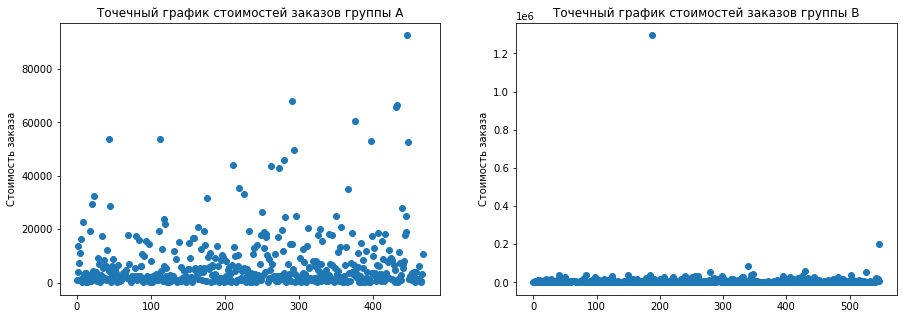

In [35]:
x_values = pd.Series(range(0,len(revenueA)))
y_values = pd.Series(range(0,len(revenueB)))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(x_values, revenueA) 
plt.title('Точечный график стоимостей заказов группы А')
plt.ylabel('Стоимость заказа')

plt.subplot(1, 2, 2)
plt.scatter(y_values, revenueB) 
plt.title('Точечный график стоимостей заказов группы В')
plt.ylabel('Стоимость заказа')
plt.show()

В обеих группах большинство пользователей совершает заказ, сумма которого не превышает 20000 рублей.

##### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [36]:
np.percentile(revenueA, [95, 99])

array([24944.5 , 56064.18])

In [37]:
np.percentile(revenueB, [95, 99])

array([27561.5, 49553.6])

Не более 5% пользователей из группы А оформляли заказ на сумму более 24944 рублей. Только 1% имеет заказы стоимостью более 56064 рублей.

В группе В не более 5% пользователей оформляли заказ на сумму более 27561 рублей. Только 1% имеет заказы стоимостью более 49553 рублей.

Можно выбрать заказы стоимостью от 28000 рублей за верхнюю границу и отсеять аномалии по ней.

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Здесь тоже границы выбросов должны скорректироваться.
</div>

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.


**H0**: различий в среднем количестве заказов между группами нет.

**H1**: различия в среднем между группами есть.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Нулевая и альтернативная гипотезы сформулированы. 

Сами гипотезы обычно обозначают так:
- H0 - Нет  различий ....
- H1 - Есть различия ....
    
</div>

In [38]:
sampleA = pd.concat(
    [
        ordersByUsersA['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.011
0.160


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Стоит подписать выводимые значения, хотя-бы p-value.
</div>

По «сырым» данным p-value = 0,011, что меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительная разница между группами составила 16%. 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Верно выбран сам тест и верно проинтерпретированы  его результаты! 

</div>

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между группами. 

**H0: различий в среднем чеке между группами нет.**

**H1: различия в среднем чеке между группами есть.**


Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [39]:
print('p-value ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value 0.829
0.287


Относительная разница среднего чека двух групп в 28,7% не является статистически значимой. P-value = 0,829, что больше 0,05. Нулевая гипотеза не отвергается, в среднем чеке статистически значимых различий нет. 

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ С одной стороны не отвергаем нулевую гипотезу, но потом говорим, что "Относительная разница среднего чека двух групп составляет 25,9%.". Выводы немного противоречат друг другу. Тут лучше изменить интерпретацию: наблюдаемое различие в 25.9% не является стат. значимым... и .т.д.

</div>  
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Так вывод звучит корректней. 
    
Тут все просто. Раз теcт показал, что нет стат значимой разницы между группами - то каково бы различие чека не было, оно не будет являться стат. значимым (у нас тут выбросы дают большое различие чеков, но их всего несколько и на общее различие среднего чека по группам они не влияют)
</div>

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28000 рублей.

**H0: различий в среднем количестве заказов между группами нет.**

**H1: различия в среднем количестве заказов между группами есть.**

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactions'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transactions'] > 1]['visitor_id'],
    ],
    axis=0,
)

revenue_lim = 28000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitor_id, dtype: int64
83


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Тут можно или непосредственно вычисления по 95 / 99 перцентилю, например:
```python 
revenue_lim = np.percentile(orders['revenue'], 95)`
```
или задавать в качестве отдельной переменой:

```python 
revenue_lim = 100000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']`
```

</div>

Всего 83 аномальных пользователей. 

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [42]:
print('p-value ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.012
0.181


По «очищенным» данным p-value 0,012%, что меньше уровня значимости. Это значит, что статистически значимые различия между группами есть, нулевая гипотеза отвергается. Относительная разница между группами 18,1%

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ И тут отвергаем нулевую гипотезу.
</div>

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


**H0: различий в среднем чеке между группами нет.**

**H1: различия в среднем чеке между группами есть.**

In [43]:
print(
    'p-value ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.851
-0.006


Наблюдаемое различие в 0,6% в среднем чеке заказа между группами по «очищенным» данным не является статистически значимым. P-value 0,851%, что больше уровня значимости. Это значит, что статистически значимых различий между группами нет, нулевая гипотеза не отвергается.

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Обрати, пожалуйста, внимание на выводы: в начале мы можем говорить о наблюдаемых различиях, а потом сказать - являются ли они стат. значимыми или нет.

</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Верно.
</div>

##### Результаты теста

Исходя из полученных результатов, тест следует остановить и установить победу группы В. 

Конверсия группы В больше, чем в группе А как до, так и после очистки данных. Разница в данных группах является статистически значимой, что дает нам возможность зафиксировать победу группы В

#### Общий вывод

Мы провели A/B-тест интернет-магазина, целью исследования было приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Этапы исследования и выводы:**

**1. Загрузка данных**

Мы загрузили данные из 3 таблиц, включающих в себя информацию по гипотезам, заказам и пользователям. Всего представлена информация по 9 гипотезам, 1016 заказам, 973 пользователям, которые совершили заказ. Из данных были исключены 58 пользователей, которые попали в обе группы теста. В данных нет пропущенных значений и дубликатов. Было обнаружено, что необходимо привести столбцы с датами к нужному формату, а также названия столбцов привести к единому стилю.

**2. Предобработка данных**

Мы провели предобработку данных, приведя столбцы с датой к нужному типу данных и переименовав названия столбцов


**3. Приоритизация гипотез**

Мы приоритизировали 9 гипотез и применили к ним 2 фреймворка: ICE и RICE. Наиболее приоритетные гипотезы по ICE: 8, 0, 7.
Самая приоритетная (8) - запустить акцию, дающую скидку на товар в день рождения и (0) - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. По RICE наиболее приоритетные гипотезы : 7, 2, 0, 6.
Наиболее приоритетная (7) - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и (2) - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

Приоритизация гипотез меняется при применении каждого фреймворка, так как при использовании RICE мы учитываем охват изменений, в отличие от ICE, что является важным критерием при оценке гипотезы. Таким образом гипотеза 8 при оценке RICE получила гораздо меньший приоритет, так как ее показатель reach всего 1, что подразумевает маленький охват.

Наиболее приоритетными можно назвать гипотезы 7 и 0. При применении каждого фреймворка эти гипотезы имеют высокие показатели.

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


**4. Анализ A/B-теста**

Для анализа A/B-теста мы подготовили данные и сформировали единый датафрейм.


- Исходя из графика кумулятивной выручки мы увидели, что у группы В выручка больше, чем у группы А на протяжении почти всего периода. Заметно резкое увеличение показателей 18 числа, которое увеличило разрыв еще больше. При этом на графике кумулятивного среднего чека было обнаружено, что в группе В средний чек почти все время выше, чем в группе А. Исключение только составляет период с 12 по 15 число, где группа А преобладает. С 18 числа наблюдается скачкообразный рост в группе В, который потом идет на спад.

- График относительного изменения кумулятивного среднего чека показал резкие различия группы B к группе A. 18 числа наблюдается резкий скачок, который потом пошел на спад

- По графику кумулятивного среднего количества заказов на посетителя по группам мы увидели, что среднее количество заказов группы В выше, чем у группы А на протяжении почти всего периода. А график относительного изменения кумулятивного среднего количества заказов на посетителя показал, что группа B имеет лучшие показатели конверсии, чем группа А.

- На точечном графике количества заказов по пользователям мы увидели, что в обеих группах большинство пользователей совершает не больше 1 заказа. Остальные случаи довольно редкие. При этом 95-й и 99-й перцентили количества заказов на пользователя показали, что не более 5% пользователей из группы А оформляли больше чем 1 заказ. Только 1% заказывал больше 2 раз. В группе В результаты аналогичные. Мы выбрали 2 заказа и более на одного пользователя за верхнюю границу числа заказов и решили отсеять аномальных пользователей по ней.

- Точечный график стоимостей заказов показал, что в обеих группах большинство пользователей совершает заказ, сумма которого не превышает 20000 рублей. Не более 5% пользователей из группы А оформляли заказ на сумму более 24944 рублей. Только 1% имеет заказы стоимостью более 56064 рублей. В группе В не более 5% пользователей оформляли заказ на сумму более 27561 рублей. Только 1% имеет заказы стоимостью более 49553 рублей. Мы выбрали заказы стоимостью от 28000 рублей за верхнюю границу нормы.

- Мы посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей. По «сырым» данным p-value = 0,011, что меньше 0,05. Нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами нет, была отвергнута. Относительная разница между группами составила 16%. При этом по «очищенным» данным p-value 0,012%, что меньше уровня значимости. Это значит, что статистически значимые различия между группами есть, нулевая гипотеза также была отвергнута. Относительная разница между группами составила 18,1%.

- Также была посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. P-value оказалась больше 0,05. Нулевая гипотеза не была отвергнута, в среднем чеке статистически значимых различий нет. Относительная разница среднего чека двух групп составила 28,7%. Также была посчитана статистическую значимость различий по «очищенным» данным, которая показала p-value равную 0,851%, что больше уровня значимости. Это также значит, что статистически значимых различий между группами нет, нулевая гипотеза не была отвергнута.

Исходя из полученных результатов мы установили, что тест следует остановить и установить победу группы В. Конверсия группы В больше, чем в группе А как до, так и после очистки данных. Разница в данных группах является статистически значимой, что дает нам возможность зафиксировать победу группы В

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️  Тест окрасился только на половину - по `количеству заказов`. Но это тоже хорошо, т.к. стат.значимой разницы по среднему чеку нет (чек не увеличился, но и не уменьшился) то при возросшем количестве заказов с сохранившимся средним чеком выручка будет так-же расти. И значит мы заканчиваем анализ A/B-теста - он оказался успешным! 

</div>

<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
 
  📃 Сократить все выводы датафреймов до 5 строк, этого достаточно для беглого ознакомления с данными.
 
  📃 Проверить корректность разбиения пользователей на группы.
    
  📃 Пересмотреть выбросы по количеству и стоимости заказов.
  
  📃 Проверить выводы теста среднего чека по сырым и очищенным данным.
    

      
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>

<div class="alert alert-info"> <b>Спасибо большое за комментарии и рекомендации:)</div>

<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Пожалуйста. 🙂 
</div>